In [1]:
from generate_fragments import generate_fragments
from Multi_Nuclei_Segmentation import create_images, optimise_regions, multi_segmentation
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

## Example on a 300x300 pixel picture

7it [00:00, 162.77it/s]


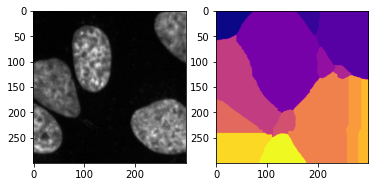

In [2]:
image = plt.imread('../images/dna-images/gnf/dna-1.png')[200:500, 200:500 ,0]   
Omega,S = generate_fragments(image,16,0.01,20,2,100)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(image, cmap = 'gray')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(Omega,cmap='plasma')

In [3]:
ListOfCoords = create_images(Omega, S)

In [4]:
theta, f = optimise_regions(image, ListOfCoords, n_jobs = -3)

[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-3)]: Done   6 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-3)]: Done  13 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-3)]: Done  16 out of  24 | elapsed:   13.8s remaining:    6.9s
[Parallel(n_jobs=-3)]: Done  19 out of  24 | elapsed:   14.7s remaining:    3.8s
[Parallel(n_jobs=-3)]: Done  22 out of  24 | elapsed:   17.2s remaining:    1.5s
[Parallel(n_jobs=-3)]: Done  24 out of  24 | elapsed:   18.6s finished


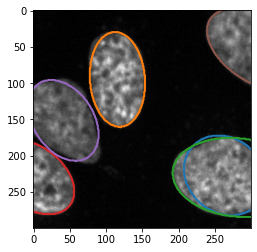

In [5]:
seg = multi_segmentation(image, Omega, S, theta, f, np.median(f))

fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for ellipse in seg:
    for contour in ellipse:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.show()

We adjust our sparsity parameter $\alpha$ to obtain just one ellipse for the lower right nuclei.

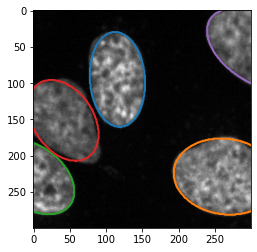

In [6]:
seg2 = multi_segmentation(image, Omega, S, theta, f, 2*np.median(f))

fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for ellipse in seg2:
    for contour in ellipse:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.show()